In [98]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

To predict the price of a car based on various Features of a car.

### 2. Data Gathering

In [157]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 3.EDA

In [158]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [159]:
df1 = df.drop(['car_ID', 'CarName'], axis = 1)
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [160]:
x = df1.drop('price', axis = 1)
y = df1['price']

#### 3.1 Encoding

In [161]:
one_hot_cols = ['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']
onehot_encoder = OneHotEncoder()
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(x[one_hot_cols]).toarray(), columns=onehot_encoder.get_feature_names_out(one_hot_cols))
x = pd.concat([x, df_encoded], axis=1)
x = x.drop(one_hot_cols, axis=1)
x

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,gas,std,two,front,94.5,171.2,65.5,52.4,2823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,gas,std,four,front,99.8,176.6,66.2,54.3,2337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,gas,std,four,front,99.4,176.6,66.4,54.3,2824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,front,109.1,188.8,68.9,55.5,2952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,gas,turbo,four,front,109.1,188.8,68.8,55.5,3049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,gas,std,four,front,109.1,188.8,68.9,55.5,3012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,diesel,turbo,four,front,109.1,188.8,68.9,55.5,3217,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### 3.2 label encoding

In [103]:
df1['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [162]:
label_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
label_encoder = LabelEncoder()
for col in label_cols:
    x[col] = label_encoder.fit_transform(x[col])
x

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4. Feature Selection/ Extraction

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 4, test_size= 0.2)

In [164]:
pca = PCA(n_components=28)
x_train_pca_array = pca.fit_transform(x_train)
pca_columns = [f"PC{i}" for i in range(1, pca.n_components_ + 1)]
x_train_pca = pd.DataFrame(x_train_pca_array, columns=pca_columns)
x_train_pca.head(3)

x_test_pca_array = pca.transform(x_test)
x_test_pca = pd.DataFrame(x_test_pca_array, columns=pca_columns)
x_test_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,73.623698,-90.694519,10.668329,6.160567,5.749705,-8.793851,5.345293,5.093829,-0.922400,0.583859,...,-0.090530,-0.521593,-0.312654,-0.158483,0.051780,0.865433,0.697043,0.157690,0.137384,0.301794
1,303.114348,83.077386,25.116183,11.949031,4.151464,-6.231754,0.759478,1.273112,-1.752916,-0.141963,...,-0.408666,0.255179,0.057651,-0.050119,-0.089976,-0.170735,-0.013810,-0.245990,-0.212291,0.125910
2,-732.484337,-73.206887,2.791332,-12.694946,5.242414,4.572038,-2.848965,-0.006133,-2.368436,0.811635,...,0.189006,-0.143183,0.035363,-0.143476,0.011888,-0.136311,-0.115315,-0.039507,-0.075818,-0.062417


### 5. Model Training

#### 5.1 Linear Regression

In [165]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_pca, y_train)

LinearRegression()

In [166]:
# training data Evaluation
y_pred_train = lin_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 6336101.558100437
RMSE: 2517.161408829485
MAE: 1822.621472323126
R-squared: 0.9054980709038289


In [167]:
# testing data Evaluation
y_pred_test = lin_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 8426595.571882833
RMSE: 2902.859895324408
MAE: 2258.410727081324
R-squared: 0.8291049226520524


#### 5.2 kNN regressor()

In [110]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_pca, y_train)

KNeighborsRegressor()

In [111]:
# training data Evaluation
y_pred_train = knn_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 6904555.99486626
RMSE: 2627.652183007915
MAE: 1665.3410548780485
R-squared: 0.8970196649968136


In [112]:
# testing data Evaluation
y_pred_test = knn_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 8186574.610114903
RMSE: 2861.219077616201
MAE: 2177.5073170731703
R-squared: 0.8339726536920141


<Axes: >

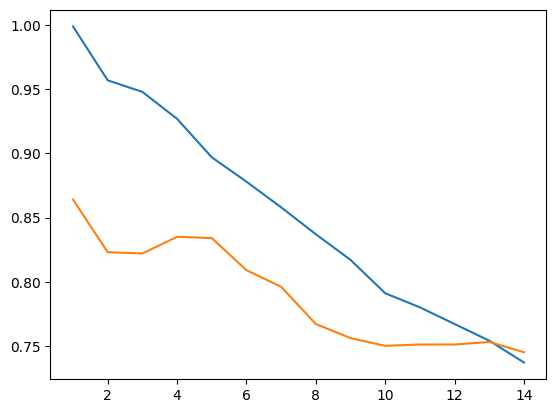

In [113]:
k_values = range(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors= k , p = 2)
    knn_reg.fit(x_train_pca, y_train)
    train_acc_list.append(np.around(knn_reg.score(x_train_pca, y_train), 3))
    test_acc_list.append(np.around(knn_reg.score(x_test_pca, y_test), 3))
    
sns.lineplot(x=k_values, y=train_acc_list)
sns.lineplot(x=k_values, y=test_acc_list)

<Axes: >

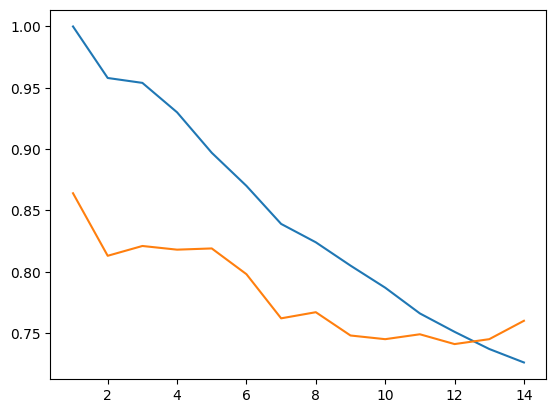

In [114]:
k_values = range(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors= k , p = 1)
    knn_reg.fit(x_train_pca, y_train)
    train_acc_list.append(np.around(knn_reg.score(x_train_pca, y_train), 3))
    test_acc_list.append(np.around(knn_reg.score(x_test_pca, y_test), 3))
    
sns.lineplot(x=k_values, y=train_acc_list)
sns.lineplot(x=k_values, y=test_acc_list)

#### 5.3 Decision Tree Regressor

In [115]:
dt_reg = DecisionTreeRegressor(random_state=5)
dt_reg.fit(x_train_pca, y_train)

DecisionTreeRegressor(random_state=5)

In [116]:
# training data Evaluation
y_pred_train = dt_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 21229.844512195123
RMSE: 145.70464821753328
MAE: 30.896341463414632
R-squared: 0.9996833603056363


In [117]:
# testing data Evaluation
y_pred_test = dt_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 14215488.621951219
RMSE: 3770.3433029302805
MAE: 2771.487804878049
R-squared: 0.7117036166191123


### Hyperparameter tuning

In [118]:
dt_reg = DecisionTreeRegressor(random_state=5)

hyp_grid = {"criterion":['squared_error','absolute error'],
            "max_depth": range(5, 10),
            "min_samples_split":range(5, 10),
            "min_samples_leaf":range(3, 8),}

gscv_dt_reg = GridSearchCV(dt_reg, param_grid=hyp_grid, cv = 3, n_jobs= -1)
gscv_dt_reg.fit(x_train_pca, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=5), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute error'],
                         'max_depth': range(5, 10),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(5, 10)})

In [119]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train_pca, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                      random_state=5)

In [120]:
# training data Evaluation
y_pred_train = dt_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 3536843.0890128873
RMSE: 1880.649645471715
MAE: 1280.1191529001844
R-squared: 0.9472485578462881


In [121]:
# testing data Evaluation
y_pred_test = dt_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 15873519.390760167
RMSE: 3984.158554922252
MAE: 2594.45687306142
R-squared: 0.6780780208415792


### 5.4 Random Forest Regressor

In [122]:
rf_reg = RandomForestRegressor(random_state=5)
rf_reg.fit(x_train_pca, y_train)

RandomForestRegressor(random_state=5)

In [123]:
# training data Evaluation
y_pred_train = rf_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 1499557.823430345
RMSE: 1224.564340257524
MAE: 756.7667541173057
R-squared: 0.977634337801254


In [124]:
# testing data Evaluation
y_pred_test = rf_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 6509622.719019613
RMSE: 2551.396229326134
MAE: 2097.795020650406
R-squared: 0.8679819781805137


#### Hyperparameter tuning

In [125]:
rf_reg = RandomForestRegressor(random_state=5)

hyp_grid = {'n_estimators': np.arange(10, 70, 5),
            "criterion":['squared_error','absolute error'],
            "max_depth": range(5, 10),
            "min_samples_split":range(5, 10),
            "min_samples_leaf":range(3, 8),}

gscv_dt_reg = GridSearchCV(rf_reg, param_grid=hyp_grid, cv = 3, n_jobs= -1)
gscv_dt_reg.fit(x_train_pca, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=5), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute error'],
                         'max_depth': range(5, 10),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(5, 10),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])})

In [126]:
rf_reg = gscv_dt_reg.best_estimator_
rf_reg.fit(x_train_pca, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=9,
                      n_estimators=10, random_state=5)

In [127]:
# training data Evaluation
y_pred_train = rf_reg.predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 5068709.476241193
RMSE: 2251.3794607398354
MAE: 1373.539990751192
R-squared: 0.9244010186483752


In [128]:
# testing data Evaluation
y_pred_test = rf_reg.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 9085601.318805914
RMSE: 3014.2331228367048
MAE: 2289.685468324689
R-squared: 0.8157399952466188


### 5.5 AdaboostRegressor

In [129]:
adb_reg = AdaBoostRegressor(random_state=5)
adb_reg.fit(x_train_pca, y_train)

AdaBoostRegressor(random_state=5)

In [130]:
# training data Evaluation
y_pred_train = adb_reg.fit(x_train_pca, y_train).predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 4352313.75691958
RMSE: 2086.2199684883612
MAE: 1791.7967054166947
R-squared: 0.9350859448370312


In [131]:
# testing data Evaluation
y_pred_test = adb_reg.fit(x_train_pca, y_train).predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 7561593.562932794
RMSE: 2749.835188321801
MAE: 2202.41590294284
R-squared: 0.846647545169608


#### Hyper parameter tuning

In [132]:
adb_reg = AdaBoostRegressor(random_state=5)

hyp_grid = {"n_estimators": range(30, 70, 4),
            "learning_rate": np.arange(0.01, 0.1, 0.001)}

gscv_adb_reg = GridSearchCV(adb_reg, param_grid=hyp_grid, cv = 3, n_jobs= -1)
gscv_adb_reg.fit(x_train_pca, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=5), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
                         'n_estimators': range(30, 70, 4)})

In [133]:
adb_reg = gscv_adb_reg.best_estimator_
adb_reg.fit(x_train_pca, y_train)

AdaBoostRegressor(learning_rate=0.08799999999999993, n_estimators=38,
                  random_state=5)

In [134]:
# training data Evaluation
y_pred_train = adb_reg.fit(x_train_pca, y_train).predict(x_train_pca)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

MSE: 5003634.63883346
RMSE: 2236.8805598049844
MAE: 1727.5922174366676
R-squared: 0.9253715993144613


In [135]:
# testing data Evaluation
y_pred_test = adb_reg.fit(x_train_pca, y_train).predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

MSE: 10312300.517630436
RMSE: 3211.2770851532628
MAE: 2575.830943637548
R-squared: 0.7908619940802544


In [172]:
with open("onehot_encoder.pkl", 'wb') as f:
    pickle.dump(onehot_encoder, f)

In [168]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [170]:
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

In [171]:
with open("Car_price_mode.pkl", "wb") as f:
    pickle.dump(lin_reg, f)